In [ ]:
# RNN
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

from gensim.models import Word2Vec
import gensim

from sklearn.preprocessing import LabelEncoder
from torch.utils.data import DataLoader, TensorDataset
from torch.autograd import Variable

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


class LinguisticFamilies:
    def __init__(self):
        self.families = {
            "Indo-European": {
                "languages": ["English", "Spanish", "Hindi", "Russian"],
                "common_characters": ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", "p", "q", "r", "s", "t", "u", "v", "w", "x", "y", "z"]  # Example phonemes
            },
            "Sino-Tibetan": {
                "languages": ["Mandarin", "Cantonese", "Burmese"],
                "common_characters": ["tʂ", "ʤ", "x", "y", "ŋ"]
            },
            "Afro-Asiatic": {
                "languages": ["Arabic", "Hebrew", "Amharic"],
                "common_characters": ["ʕ", "ħ", "ʃ", "q"]
            },
            "Dravidian": {
                "languages": ["Tamil", "Telugu", "Kannada"],
                "common_characters": ["ము",]
            },
            "Austronesian": {
                "languages": ["Tagalog", "Malay", "Samoan"],
                "common_characters": ["ŋ"]
            },
            "Turkic": {
                "languages": ["Turkish", "Azerbaijani", "Uzbek"],
                "common_characters": ["ü", "ö", "ş", "ğ"]
            },
            "Uralic": {
                "languages": [],
                "common_characters": ["ű"]
            }
        }

    def get_families(self):
        """Return the linguistic families."""
        obj = {}
        index = 0
        for x in list(self.families.keys()):
          for y in self.families[x]["common_characters"]:
            obj[y] = index
            index += 1
        return obj

all_letters = LinguisticFamilies().get_families()
print(all_letters)
n_letters = 42


def letterToIndex(letter):
    return all_letters[letter] if letter in all_letters else -1

# Turn a line into a <line_length x 1 x n_letters>,
# or an array of one-hot letter vectors
def lineToTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line):
        tensor[li][0][letterToIndex(letter)] = 1
    return tensor

print(lineToTensor('jones').size())

{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6, 'h': 7, 'i': 8, 'j': 9, 'k': 10, 'l': 11, 'm': 12, 'n': 13, 'o': 14, 'p': 15, 'q': 34, 'r': 17, 's': 18, 't': 19, 'u': 20, 'v': 21, 'w': 22, 'x': 28, 'y': 29, 'z': 25, 'tʂ': 26, 'ʤ': 27, 'ŋ': 36, 'ʕ': 31, 'ħ': 32, 'ʃ': 33, 'ము': 35, 'ü': 37, 'ö': 38, 'ş': 39, 'ğ': 40, 'ű': 41}
torch.Size([5, 1, 42])


In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt

etymology = pd.read_csv('etymology.csv')
#df = etymology[etymology['lang'] == 'English']
#engl = df.drop(['lang', 'term_id', 'related_term_id', 'position', 'group_tag', 'parent_tag', 'parent_position'], axis = 1)

In [6]:
def combineLangs(word):
  word = word.lower()
  if "latin" in word:
    return "latin"
  elif "greek" in word:
    return "greek"
  elif "french" in word:
    return "french"
  elif "german" in word:
    return "german"
  elif "italian" in word:
    return "italian"
  elif "swedish" in word:
    return "swedish"
  elif "irish" in word:
    return "irish"
  elif "english" in word:
    return "english"
  elif "dutch" in word:
    return "dutch"
  elif "turkish" in word:
    return "turkish"
  elif "norwegian" in word:
    return "norwegian"
  elif "frisian" in word:
    return "frisian"
  elif "spanish" in word:
    return "spanish"
  elif "chinese" in word:
    return "chinese"
  else:
    return word

indo_european = [
    'italian', 'spanish', 'german', 'latin', 'old portuguese',
    'english', 'serbo-croatian', 'french', 'old czech', 'irish',
    'dutch', 'sanskrit', 'greek', 'gujarati', 'polish', 'welsh',
    'russian', 'romanian', 'czech', 'vietnamese', 'old saxon',
    'swedish', 'old armenian', 'classical nahuatl', 'yiddish',
    'classical syriac', 'albanian', 'bengali', 'armenian', 'latvian',
    'norwegian', 'sorbian', 'scots', 'celtic', 'classical persian',
    'hindi', 'finnish', 'old georgian', 'georgian', 'tamil',
    'turkish', 'bulgarian', 'ukrainian', 'icelandic'
]

# Turkic languages
turkic = [
    'common turkic', 'bashkir', 'turkish', 'uzbek', 'kyrgyz',
    'tatar', 'crimean tatar', 'azerbaijani', 'kazakh', 'chuvash',
    'northern kurdish', 'southern altai', 'uyghur'
]

# Uralic languages
uralic = [
    'hungarian', 'finnish', 'estonian', 'karelian', 'evenki',
    'komi', 'mari', 'moksha', 'udmurt', 'votic'
]

# Afro-Asiatic languages
afro_asiatic = [
    'arabic', 'amharic', 'hebrew', 'berber', 'coptic'
]

# Sino-Tibetan languages
sino_tibetan = [
    'mandarin', 'tibetan', 'burmese', 'yue', 'hakkanese'
]

# Austronesian languages
austronesian = [
    'tagalog', 'javanese', 'malay', 'samoan', 'hawaiian'
]

# Dravidian languages
dravidian = [
    'kannada', 'telugu', 'tamil', 'malayalam'
]

# Semitic languages
semitic = [
    'arabic', 'hebrew', 'amarna', 'akkadian', 'ge', 'ez'
]

# Celtic languages
celtic = [
    'irish', 'welsh', 'scots', 'breton', 'cornish'
]

# Other languages
other_languages = [
    'old norse', 'georgian', 'faroese', 'sumerian', 'khmer',
    'maltese', 'gujarati', 'assamese', 'sindhi', 'bambara',
    'japanese', 'votic', 'tagalog', 'navajo', 'manchu',
    'classical hebrew', 'tuvan', 'zhuang', 'quechua'
]

# Dutch languages and their dialects
dutch_languages = [
    'dutch', 'frisian', 'limburgish', 'flemish'
]

def getLanguageFamily(lang):
  if lang in indo_european:
    return "indo_european"
  if lang in turkic:
    return "turkic"
  if lang in uralic:
    return "uralic"
  if lang in afro_asiatic:
    return "afro-asiatic"
  if lang in sino_tibetan:
    return "sino-tibetan"
  if lang in austronesian:
    return "austronesian"
  if lang in dravidian:
    return "dravidian"
  if lang in semitic:
    return "semitic"

  return "unknown"


In [12]:
# preprocessing

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt

# getting a sample since it takes really long with the entire set
#limited = engl #.sample(60000)

# these languages use similar alphabets to English
#limited = etymology#[(etymology['lang'] == 'English') | (etymology['lang'] == 'German') | (etymology['lang'] == 'Spanish') | (etymology['lang'] == 'Italian')]
limited = etymology.drop(['lang', 'term_id', 'related_term_id', 'position', 'group_tag', 'parent_tag', 'parent_position'], axis = 1)
#limited = limited.sample(100000)
limited = limited.dropna()

# combine languages (ie ancient greek -> greek, old english -> english)
limited["related_lang"] = limited["related_lang"].apply(combineLangs)

# select higher frequency languages
'''
frequency = limited['related_lang'].value_counts()
limited['frequency'] = limited['related_lang'].map(frequency)
limited.loc[limited['frequency'] < 10, 'related_lang'] = 'uncommon'
print("All languages", limited["related_lang"].unique())
'''

# filter words that are short
limited = limited[limited["term"].str.len() > 3]

# make everything lowercase
limited["term"] = limited["term"].str.lower()

# reduce each term to it's most frequent related_lang
'''
print("before", len(limited))
count_df = limited.groupby(["term", "related_lang"]).size().reset_index(name="count")
most_common = count_df.loc[count_df.groupby('term')['count'].idxmax()]
limited = pd.merge(limited, most_common[['term', 'related_lang']], on=['term', 'related_lang'])
print("after", len(limited))
'''

# get the region for each language
limited["family"] = limited["related_lang"].apply(lambda x: getLanguageFamily(x))
print("Most frequent regions", limited["family"].unique())

# drop sino-tibetan and afro-asiatic (these ones mess everything up)
limited = limited[(limited["family"] != "sino-tibetan") & (limited["family"] != "afro-asiatic")]

# remove unknown regions
limited = limited[limited["family"] != "unknown"]

# select from a specific reltype?
limited = limited[limited["reltype"] == "etymologically_related_to"]


# get labels
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
labels = encoder.fit_transform(limited['family'])
print("labels", encoder.classes_)
n_categories = len(encoder.classes_)
all_categories = encoder.classes_.tolist()

print("total rows after processing", len(limited))

#X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size = test_size, random_state = seed)



<ipython-input-12-fc276650f739>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  limited["term"] = limited["term"].str.lower()


Most frequent regions ['indo_european' 'unknown' 'austronesian' 'afro-asiatic' 'uralic' 'turkic'
 'dravidian' 'semitic' 'sino-tibetan']
labels ['austronesian' 'dravidian' 'indo_european' 'semitic' 'turkic' 'uralic']
total rows after processing 64704


In [13]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size, hidden_size)
        self.h2h = nn.Linear(hidden_size, hidden_size)
        self.h2o = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        hidden = F.tanh(self.i2h(input) + self.h2h(hidden))
        output = self.h2o(hidden)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

n_hidden = 128
rnn = RNN(n_letters, n_hidden, n_categories)

In [14]:
def categoryFromOutput(output):
    top_n, top_i = output.topk(1)
    category_i = top_i[0].item()
    return all_categories[category_i], category_i

input = lineToTensor('Albert')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input[0], hidden)
print(output)

print(categoryFromOutput(output))


tensor([[-1.9059, -1.8923, -1.7494, -1.7600, -1.6867, -1.7748]],
       grad_fn=<LogSoftmaxBackward0>)
('turkic', 4)


In [15]:
criterion = nn.NLLLoss()

learning_rate = 0.005 # If you set this too high, it might explode. If too low, it might not learn

def train(category_tensor, line_tensor):
    hidden = rnn.initHidden()

    rnn.zero_grad()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    loss = criterion(output, category_tensor)
    loss.backward()

    # Add parameters' gradients to their values, multiplied by learning rate
    for p in rnn.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate)

    return output, loss.item()

In [16]:
import random

def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]

# giving europe a higher chance to be selected
better_categories = [*all_categories, "indo_european"]

families = {}
for family in all_categories:
  families[family] = limited[limited["family"] == family]["term"].values

def randomTrainingExample():
    category = randomChoice(better_categories)
    line = randomChoice(families[category])
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    line_tensor = lineToTensor(line)
    return category, line, category_tensor, line_tensor

for i in range(10):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    print('related term region =', category, '/ word =', line)

related term region = semitic / word = akkad
related term region = turkic / word = yardım
related term region = indo_european / word = militant
related term region = indo_european / word = hector
related term region = indo_european / word = float
related term region = austronesian / word = abaca
related term region = semitic / word = حمار
related term region = uralic / word = moist
related term region = turkic / word = слон
related term region = dravidian / word = wootz


In [17]:
import time
import math

n_iters = 10000
print_every = 500
plot_every = 500

current_loss = 0
all_losses = []

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output, loss = train(category_tensor, line_tensor)
    current_loss += loss

    # Print ``iter`` number, loss, name and guess
    if iter % print_every == 0:
        guess, guess_i = categoryFromOutput(output)
        #correct = '✓' if guess == category else '✗ (%s)' % category
        #print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))

    # Add current loss avg to list of losses
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        print(timeSince(start), str(iter) + "/" + str(n_iters), "loss:", current_loss / plot_every)
        current_loss = 0

0m 0s 500/10000 loss: 1.7327516973018646
0m 1s 1000/10000 loss: 1.653469674706459
0m 3s 1500/10000 loss: 1.5422072619199754
0m 4s 2000/10000 loss: 1.4112543315291404
0m 6s 2500/10000 loss: 1.2407349519878625
0m 7s 3000/10000 loss: 1.12073039239645
0m 8s 3500/10000 loss: 1.0346968780383468
0m 9s 4000/10000 loss: 0.8956852015927435
0m 10s 4500/10000 loss: 0.7954414750784635
0m 11s 5000/10000 loss: 0.7378169211409986
0m 12s 5500/10000 loss: 0.678326078813523
0m 13s 6000/10000 loss: 0.694397941655945
0m 14s 6500/10000 loss: 0.6461013793409802
0m 14s 7000/10000 loss: 0.636681987336371
0m 15s 7500/10000 loss: 0.5560013128533028
0m 16s 8000/10000 loss: 0.54988943658676
0m 17s 8500/10000 loss: 0.571364569134661
0m 19s 9000/10000 loss: 0.45770097081840505
0m 20s 9500/10000 loss: 0.5526220292731887
0m 21s 10000/10000 loss: 0.527004341706168


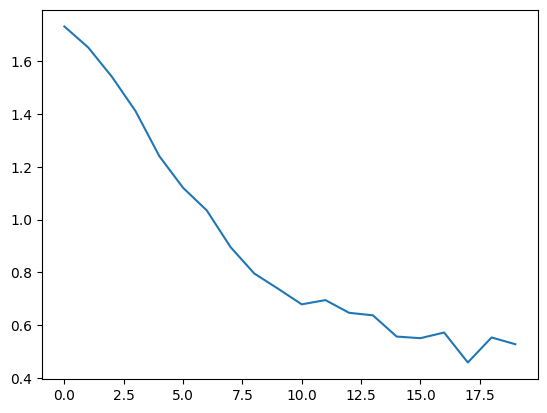

In [18]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)

In [24]:
confusion = torch.zeros(n_categories, n_categories)
n_confusion = 500

# Just return an output given a line
def evaluate(line_tensor):
    hidden = rnn.initHidden()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    return output

total = 0
correct = 0
# Go through a bunch of examples and record which are correctly guessed
for i in range(n_confusion):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output = evaluate(line_tensor)
    guess, guess_i = categoryFromOutput(output)
    category_i = all_categories.index(category)
    total += 1
    correct += 1 if guess == category else 0
    confusion[category_i][guess_i] += 1

print("correct =", correct, "/", total)

for family in all_categories:
  print("Total words for", family, len(limited[limited["family"] == family]))

# not really a lot of data for anything besides indo_european, the results are probably misleading

correct = 392 / 500
Total words for austronesian 109
Total words for dravidian 12
Total words for indo_european 64337
Total words for semitic 18
Total words for turkic 16
Total words for uralic 212


<ipython-input-25-bf99e0e87afd>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + all_categories, rotation=90)
<ipython-input-25-bf99e0e87afd>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + all_categories)


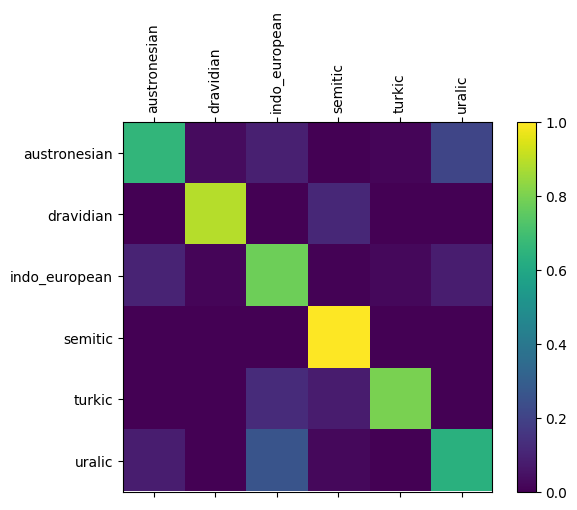

In [25]:
# Normalize by dividing every row by its sum
for i in range(n_categories):
    confusion[i] = confusion[i] / confusion[i].sum()

# Set up plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)

# Set up axes
ax.set_xticklabels([''] + all_categories, rotation=90)
ax.set_yticklabels([''] + all_categories)

# Force label at every tick
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

# sphinx_gallery_thumbnail_number = 2
plt.show()